# World Population Analysis

 Prelim Steps

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
world_population_data = pd.read_excel('world_population2023.xlsx')

Data Exploration and Cleaning

In [4]:
world_population_data.head()

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5


In [5]:
world_population_data['current population'] = world_population_data['current population'].str.replace(',', '').astype(float)
world_population_data['population 2022'] = world_population_data['population 2022'].str.replace(',', '').astype(float)

In [6]:
world_population_data.head()

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,1.423119e+09,1.417173e+09,3.3M,3M,481,0.81%,17.85%,1
1,1,China,1.425820e+09,1.425887e+09,9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,3.392315e+08,3.382899e+08,9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,2.765769e+08,2.755013e+08,1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,2.385172e+08,2.358249e+08,881.9K,770.9K,312,1.98%,3.00%,5


In [7]:
world_population_data.shape

(205, 10)

In [8]:
world_population_data.columns

Index(['Unnamed: 0', 'country name', 'current population', 'population 2022',
       'area', 'land area', 'density', 'growth rate', 'world percentage',
       'rank'],
      dtype='object')

In [9]:
world_population_data.dtypes

Unnamed: 0              int64
country name           object
current population    float64
population 2022       float64
area                   object
land area              object
density                 int64
growth rate            object
world percentage       object
rank                    int64
dtype: object

We can use the pd.to_numeric() function to convert the 'current population' and 'population 2022' columns to float data types for further analysis process.

In [10]:
world_population_data['current population'] = pd.to_numeric(world_population_data['current population'], errors='coerce')
world_population_data['population 2022'] = pd.to_numeric(world_population_data['population 2022'], errors='coerce')

In [11]:
print(world_population_data.dtypes)

Unnamed: 0              int64
country name           object
current population    float64
population 2022       float64
area                   object
land area              object
density                 int64
growth rate            object
world percentage       object
rank                    int64
dtype: object


In [12]:
world_population_data.describe()

,Unnamed: 0,current population,population 2022,density,rank
count,205.000000,2.050000e+02,2.050000e+02,205.000000,205.000000
mean,102.000000,3.907452e+07,3.888173e+07,344.063415,104.351220
std,59.322565,1.458696e+08,1.455222e+08,1482.714281,61.585136
min,0.000000,5.180000e+02,5.100000e+02,1.000000,1.000000
25%,51.000000,1.480242e+06,1.472233e+06,35.000000,52.000000
50%,102.000000,7.590327e+06,7.529475e+06,95.000000,103.000000
75%,153.000000,2.857019e+07,2.816054e+07,235.000000,154.000000
max,204.000000,1.425820e+09,1.425887e+09,18149.000000,234.000000


In [13]:
world_population_data.dropna(inplace=True)

In [14]:
world_population_data.isnull().sum()

Unnamed: 0            0
country name          0
current population    0
population 2022       0
area                  0
land area             0
density               0
growth rate           0
world percentage      0
rank                  0
dtype: int64

Statistical Analysis and Visualization

In [15]:
mean_population = np.mean(world_population_data['current population'])
median_population = np.median(world_population_data['current population'])
mode_population = world_population_data['current population'].mode()[0]

print('Mean Population:', mean_population)
print('Median Population:', median_population)
print('Mode Population:', mode_population)

Mean Population: 39266059.38235294
Median Population: 8151866.5
Mode Population: 11396.0


In [16]:
mean_pop_2022 = np.mean(world_population_data['population 2022'])
median_pop_2022 = np.median(world_population_data['population 2022'])
mode_pop_2022 = world_population_data['population 2022'].mode()[0]

print('Mean Population 2022:', mean_pop_2022)
print('Median Population 2022:', median_pop_2022)
print('Mode Population 2022:', mode_pop_2022)

Mean Population 2022: 39072328.52941176
Median Population 2022: 8067596.5
Mode Population 2022: 11312.0


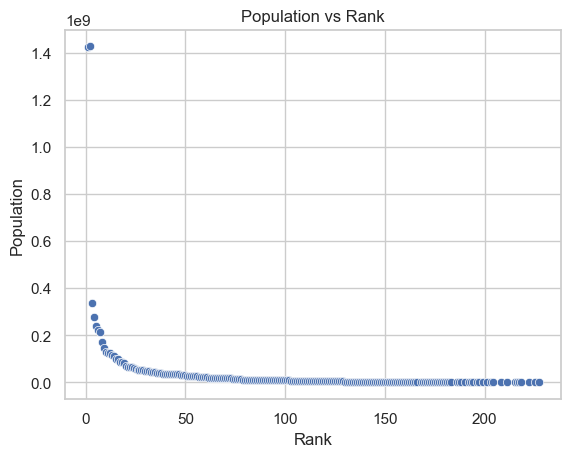

In [18]:
sns.set(style="whitegrid")

# Create scatterplot
sns.scatterplot(x="rank", y="current population", data=world_population_data)

# Set title and labels
plt.title("Population vs Rank")
plt.xlabel("Rank")
plt.ylabel("Population")

# Show plot
plt.show()

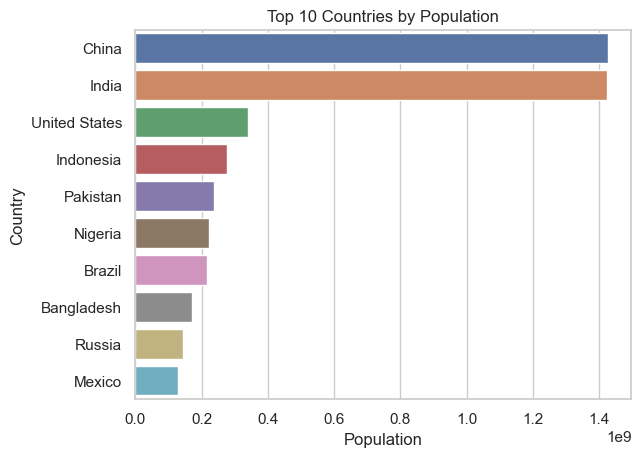

In [19]:
# Sort data by population
sorted_data = world_population_data.sort_values("current population", ascending=False)

# Create bar chart
sns.barplot(x="current population", y="country name", data=sorted_data.head(10))

# Set title and labels
plt.title("Top 10 Countries by Population")
plt.xlabel("Population")
plt.ylabel("Country")

# Show plot
plt.show()

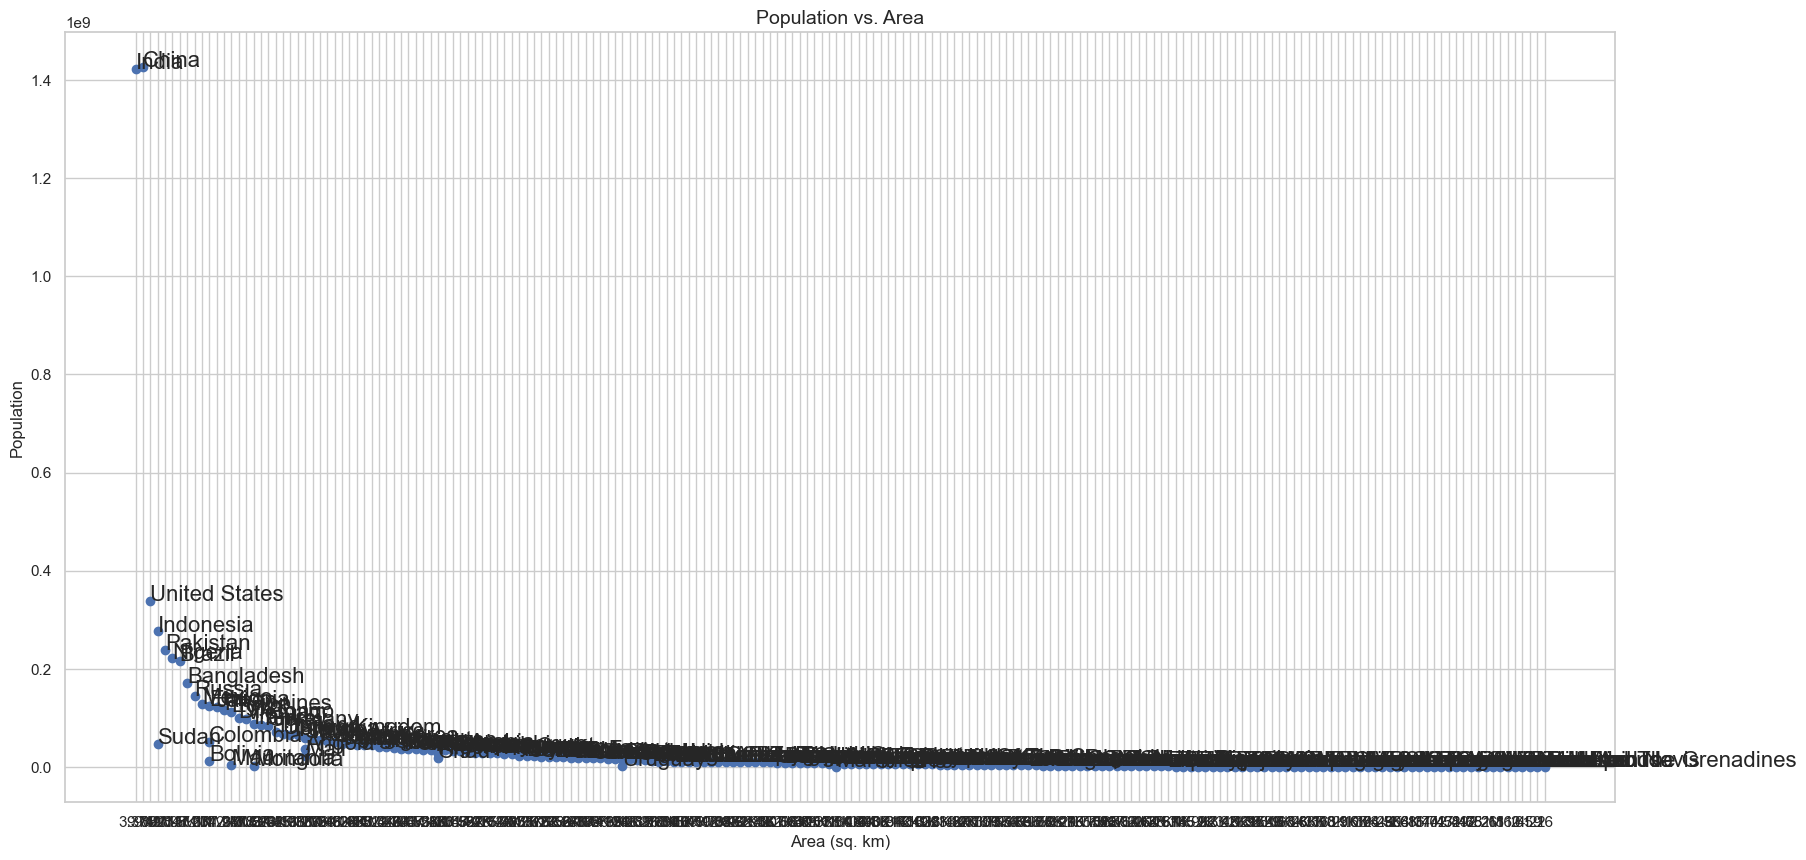

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))

# create scatter plot
ax.scatter(world_population_data['area'], world_population_data['current population'])

# add labels for each country
for i in range(len(world_population_data)):
    ax.annotate(world_population_data['country name'][i], (world_population_data['area'][i], world_population_data['current population'][i]), fontsize=16)

# set axis labels and title
ax.set_xlabel('Area (sq. km)', fontsize=12)
ax.set_ylabel('Population', fontsize=12)
ax.set_title('Population vs. Area', fontsize=14)

# display the plot
plt.show()

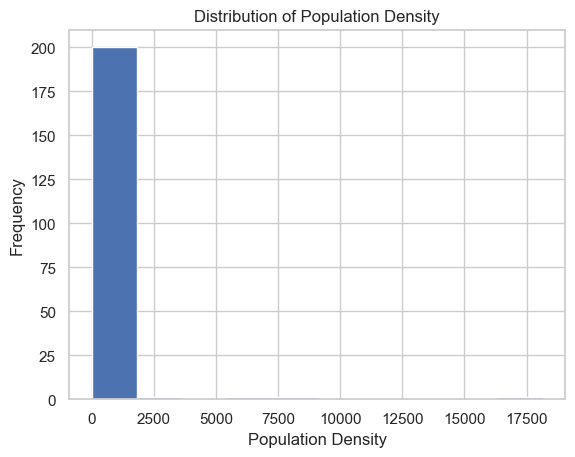

In [21]:
plt.hist(world_population_data['density'], bins=10)

# set axis labels and title
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.title('Distribution of Population Density')

# display the plot
plt.show()

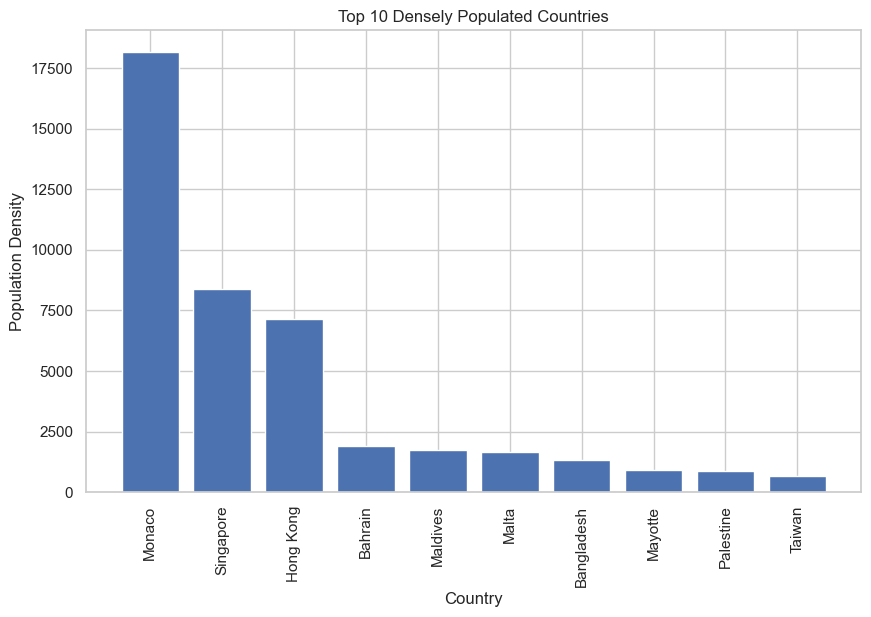

In [22]:
world_population_density = world_population_data.sort_values('density', ascending=False)

# top 10 densely populated countries
top_10_dense = world_population_density.head(10)

# plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_dense['country name'], top_10_dense['density'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Population Density')
plt.title('Top 10 Densely Populated Countries')
plt.show()

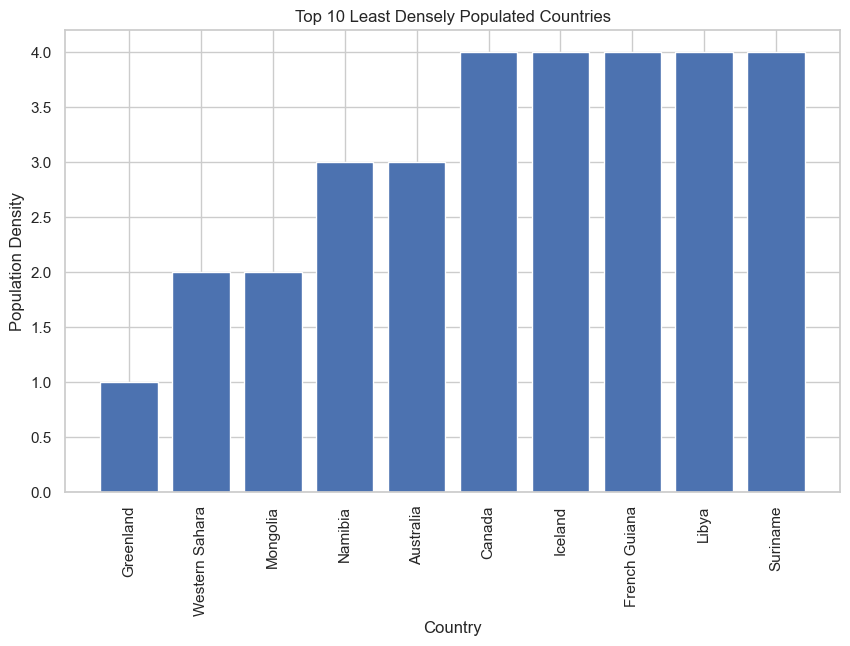

In [23]:
world_population_density = world_population_data.sort_values('density', ascending=True)

# top 10 least densely populated countries
top_10_least_dense = world_population_density.head(10)

# plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_least_dense['country name'], top_10_least_dense['density'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Population Density')
plt.title('Top 10 Least Densely Populated Countries')
plt.show()

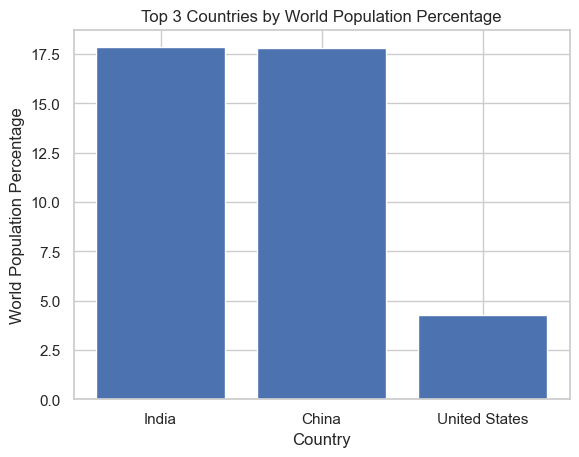

In [24]:
world_population_data['world percentage'] = world_population_data['world percentage'].str.rstrip('%').astype(float)

# sort dataframe by "world percentage" in descending order
world_population_percentage = world_population_data.sort_values('world percentage', ascending=False)

# create bar plot of top 3 countries by world percentage
top_3_world_percentage = world_population_percentage.head(3)
plt.bar(top_3_world_percentage['country name'], top_3_world_percentage['world percentage'])
plt.xlabel('Country')
plt.ylabel('World Population Percentage')
plt.title('Top 3 Countries by World Population Percentage')
plt.show()

In [25]:
world_population_density = world_population_data.sort_values('density', ascending=False)

# add a 'rank' column to the dataframe based on population density
world_population_density['rank'] = world_population_density['density'].rank(method='dense', ascending=False)

# select the top 10 countries by population density
top_10_dense = world_population_density.head(10)

# display the top 10 countries with their rank and population density
print(top_10_dense[['rank', 'country name', 'density']])

     rank country name  density
199   1.0       Monaco    18149
113   2.0    Singapore     8377
103   3.0    Hong Kong     7135
153   4.0      Bahrain     1892
172   5.0     Maldives     1737
171   6.0        Malta     1672
7     7.0   Bangladesh     1329
179   8.0      Mayotte      898
120   9.0    Palestine      892
56   10.0       Taiwan      661


In [26]:
top_10_population = world_population_data.sort_values('current population', ascending=False).head(10)

print(top_10_population)

   Unnamed: 0   country name  current population  population 2022    area  \
1           1          China        1.425820e+09     1.425887e+09    9.7M   
0           0          India        1.423119e+09     1.417173e+09    3.3M   
2           2  United States        3.392315e+08     3.382899e+08    9.4M   
3           3      Indonesia        2.765769e+08     2.755013e+08    1.9M   
4           4       Pakistan        2.385172e+08     2.358249e+08  881.9K   
5           5        Nigeria        2.215925e+08     2.185412e+08  923.8K   
6           6         Brazil        2.159050e+08     2.153135e+08    8.5M   
7           7     Bangladesh        1.722209e+08     1.711864e+08  147.6K   
8           8         Russia        1.446524e+08     1.447133e+08   17.1M   
9           9         Mexico        1.280619e+08     1.275041e+08      2M   

  land area  density growth rate  world percentage  rank  
1      9.4M      151      -0.02%             17.81     2  
0        3M      481       0.81%  

In [27]:
world_population_data['growth rate'] = world_population_data['growth rate'].str.rstrip('%').astype('float')/100

In [28]:
world_population_data.dtypes

Unnamed: 0              int64
country name           object
current population    float64
population 2022       float64
area                   object
land area              object
density                 int64
growth rate           float64
world percentage      float64
rank                    int64
dtype: object

In [29]:
df_sorted = world_population_data.sort_values(by=['growth rate'], ascending=False)

# Get the top 10 countries by growth rate
top_10_growth_rate = df_sorted.head(10)

# Rank the top 10 countries by growth rate
top_10_growth_rate['growth rate rank'] = top_10_growth_rate['growth rate'].rank(method='dense', ascending=False)

# Print the top 10 countries by growth rate and their ranks
print(top_10_growth_rate[['country name', 'growth rate', 'growth rate rank']])

    country name  growth rate  growth rate rank
133      Moldova       0.0498               1.0
59         Syria       0.0498               1.0
53         Niger       0.0380               2.0
14      Dr Congo       0.0329               3.0
66          Chad       0.0313               4.0
57          Mali       0.0310               5.0
68       Somalia       0.0310               5.0
41        Angola       0.0308               6.0
179      Mayotte       0.0303               7.0
21      Tanzania       0.0296               8.0


C:\Users\Navdeep Sorlan\AppData\Local\Temp\ipykernel_15840\4122390011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_growth_rate['growth rate rank'] = top_10_growth_rate['growth rate'].rank(method='dense', ascending=False)


In [30]:
df_sorted = world_population_data.sort_values(by=['world percentage'], ascending=False)

# Get the top 10 countries by world percentage
top_10_world_percentage = df_sorted.head(10)

# Rank the top 10 countries by world percentage
top_10_world_percentage['world percentage rank'] = top_10_world_percentage['world percentage'].rank(method='dense', ascending=False)

# Print the top 10 countries by world percentage and their ranks
print(top_10_world_percentage[['country name', 'world percentage', 'world percentage rank']])

    country name  world percentage  world percentage rank
0          India             17.85                    1.0
1          China             17.81                    2.0
2  United States              4.25                    3.0
3      Indonesia              3.47                    4.0
4       Pakistan              3.00                    5.0
5        Nigeria              2.80                    6.0
6         Brazil              2.70                    7.0
7     Bangladesh              2.16                    8.0
8         Russia              1.80                    9.0
9         Mexico              1.60                   10.0


C:\Users\Navdeep Sorlan\AppData\Local\Temp\ipykernel_15840\3644770443.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_world_percentage['world percentage rank'] = top_10_world_percentage['world percentage'].rank(method='dense', ascending=False)


Based on our analysis, we can conclude that Monaco is the most densely populated country, followed by Singapore and Hong Kong. In terms of growth rate, Moldova and Syria have the highest growth rates, followed by Niger and the Democratic Republic of the Congo. India has the largest world percentage, followed by China and the United States. Finally, the least densely populated country is Greenland.
We can also see that India, China, and the United States rank highly in terms of world percentage, but India has the highest world percentage despite having a lower current population than China. Bangladesh also appears on both the growth rate and world percentage rankings, indicating its significant population growth.